# 5.1


In [97]:
import numpy as np
import scipy.stats as st
import scipy.integrate as si
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

mu = [1, 4]
sigma = [[10, 8], [8, 10]]
y = [-3., 0., 1., 5.]
x = np.arange(-10, 10, 0.01)

In [131]:
n = np.mgrid[-7:9:0.05, -4:12:0.05]
density = np.array([[st.multivariate_normal.pdf((n[0, i, j], n[1, i, j]), mean = mu, cov = sigma)
    for i in range(n[0].shape[0])]
        for j in range(n[0].shape[1])])

Построим график плотности случайного вектора $\xi = (\xi_{1}, \xi_{2})$ \~ $N\begin{pmatrix} \begin{pmatrix} 1 \\ 4 \end{pmatrix}, \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix} \end{pmatrix}$:

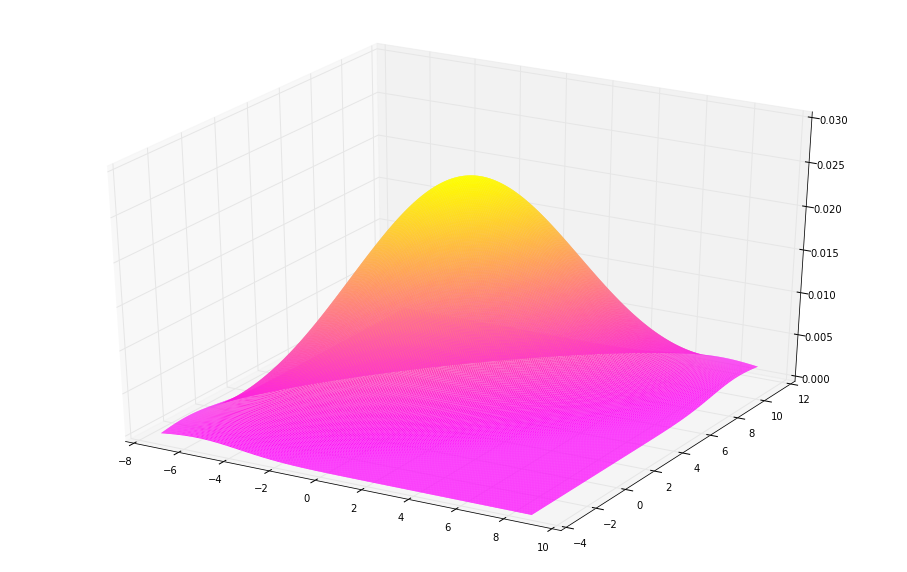

In [132]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(n[0], n[1], density, rstride=1, cstride=1, cmap='spring', linewidth=0)
plt.show()

In [134]:
def y_density (y_var):
    spots = np.array([], dtype=float)
    sovmest_density = st.multivariate_normal(mean = mu, cov = sigma)
    dens = si.quad(lambda x: sovmest_density.pdf([x, y_var]), -1000, 1000)
    for i in range(len(x)):
        spots = np.append(spots, sovmest_density.pdf([x[i], y_var]) / dens[0])
    return spots

Построим графики условной плотности $f_{\xi_{1} | \xi_{2}}(x | y)$ для $y \in \{-3, 0, 1, 5\}$:

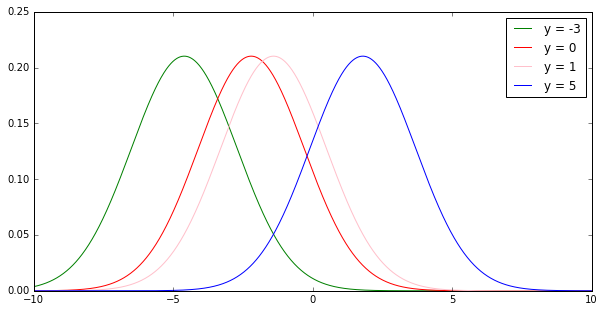

In [135]:
plt.figure(figsize=(10, 5))
plt.plot(x, y_density(y[0]), 'green', label="y = %d" %y[0])
plt.plot(x, y_density(y[1]), 'red', label="y = %d" %y[1])
plt.plot(x, y_density(y[2]), 'pink', label="y = %d" %y[2])
plt.plot(x, y_density(y[3]), 'blue', label="y = %d" %y[3])
plt.legend() 
plt.show()

In [144]:
spots = np.array([], dtype=float)
for k in x:
    sovmest_density = st.multivariate_normal(mean = mu, cov = sigma)
    dens = si.quad(lambda n: sovmest_density.pdf([n, k]), -1000, 1000)
    mat_oj = si.quad(lambda n: n*sovmest_density.pdf([n, k])/dens[0], -100, 100)
    spots = np.append(spots, mat_oj[0])

Построим графики $F_1(y) = E(\xi_{1} | \xi_{2} = y)$ и $F_2(y) = E(\xi_{1})$:

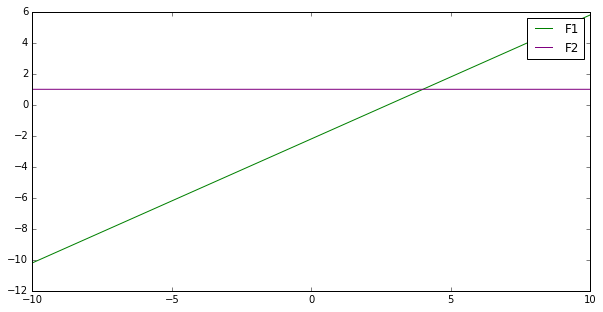

In [202]:
plt.figure(figsize=(10, 5))
plt.plot(x, spots, 'green', label="F1")
plt.plot(x, np.ones(len(x)), 'purple', label="F2")
plt.legend() 
plt.show()